In [3]:
from basicpy import BaSiC
from matplotlib import pyplot as plt
import numpy as np
import zarr

In [4]:
path      = '/u/home/f/f7xiesnm/project-zipursky/data/hold/lt172/r1_export.n5'

In [10]:
zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')
images = zarr_data[f'/c3/s4'][...]
images.shape

(187, 227, 228)

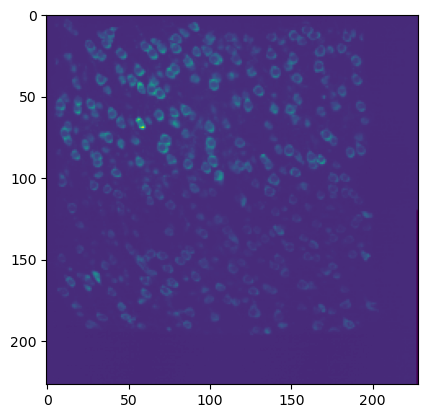

In [12]:
# images = bdata.wsi_brain()
plt.imshow(images[50])

In [13]:
%%time
basic = BaSiC(get_darkfield=True, smoothness_flatfield=1)
basic.fit(images)

CPU times: user 31 s, sys: 4.34 s, total: 35.3 s
Wall time: 16.1 s


In [14]:
%%time
images_transformed = basic.transform(images)

CPU times: user 33.7 ms, sys: 70.2 ms, total: 104 ms
Wall time: 102 ms


In [15]:
images.shape, images_transformed.shape

((187, 227, 228), (187, 227, 228))

In [16]:
basic.flatfield.shape, basic.darkfield.shape

((227, 228), (227, 228))

In [17]:
F = basic.flatfield
D = basic.darkfield

In [18]:
T = images_transformed 
O = images

In [19]:
i = 12
np.all(D+T[i]*F-O[i] < 1e-3)

True

In [20]:
np.all(D+T*F-O < 1e-2)

True

In [21]:
T.shape, F.shape

((187, 227, 228), (227, 228))

In [22]:
np.all(T - (O-D)/F < 1e-2)

True

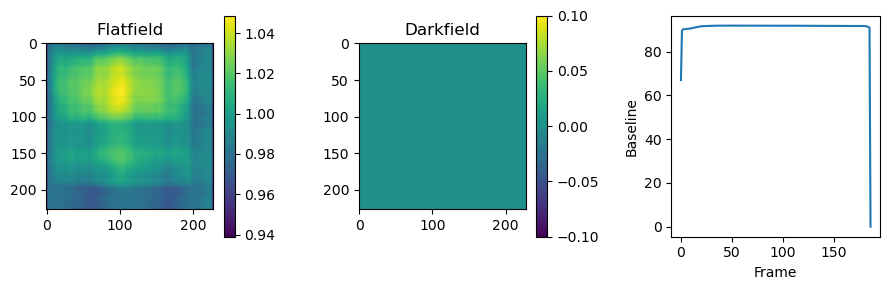

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

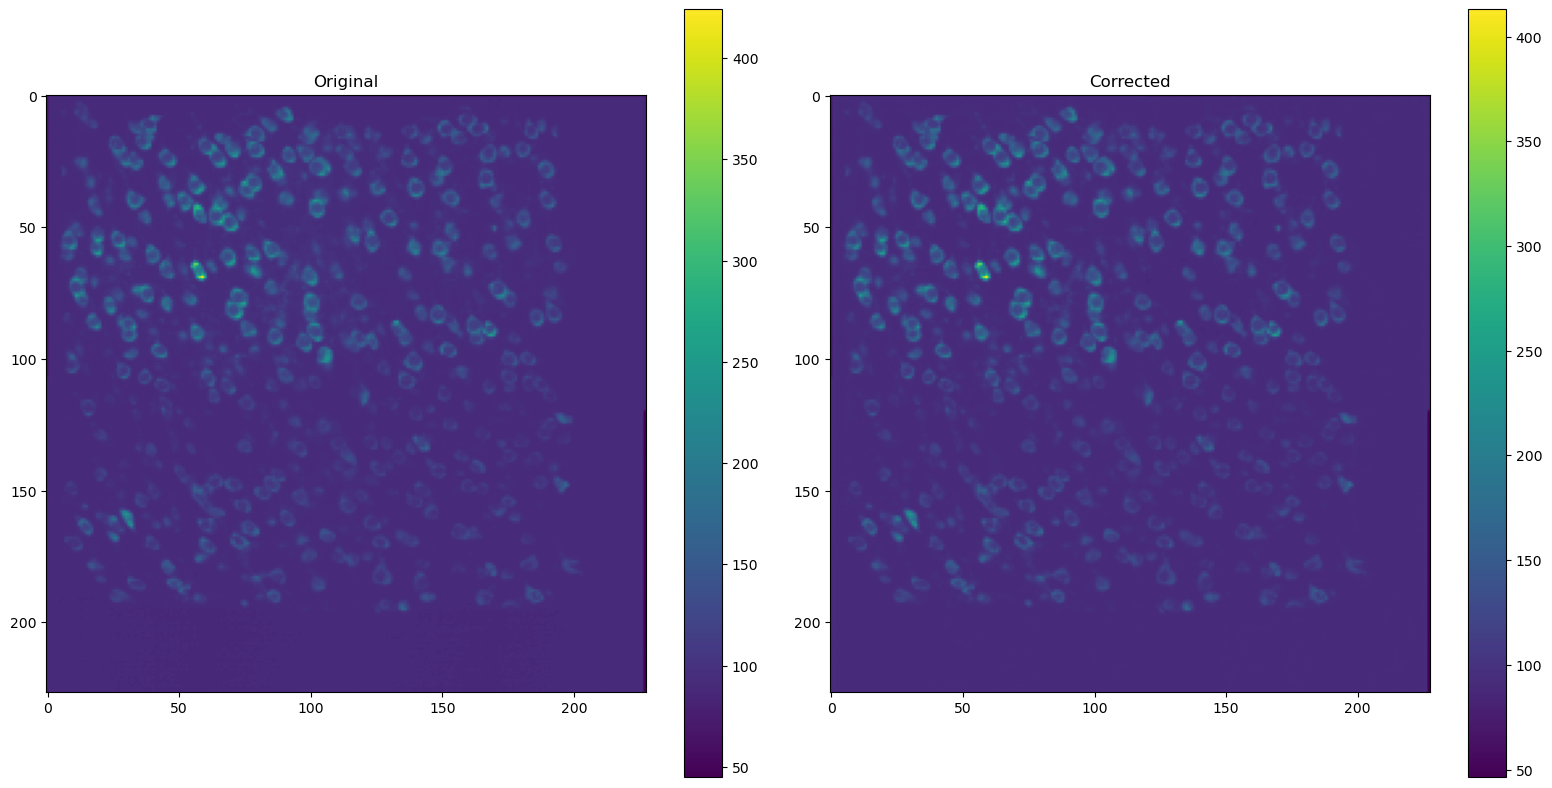

In [27]:
i = 50
fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images[i])
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i])
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()